Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

In [ ]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
videos_dataframe = pd.read_parquet('https://raw.githubusercontent.com/aryan-jadon/Dataset-ML-Spring-2022/main/train.parquet')

In [ ]:
videos_dataframe.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


### Data Refactoring

In [ ]:
all_categories = {
  "1":"Film & Animation",
  "2":"Autos & Vehicles",
  "10":"Music",
  "15":"Pets & Animals",
  "17":"Sports",
  "18":"Short Movies",
  "19":"Travel & Events",
  "20":"Gaming",
  "21":"Videoblogging",
  "22":"People & Blogs",
  "23":"Comedy",
  "24":"Entertainment",
  "25":"News & Politics",
  "26":"How to & Style",
  "27":"Education",
  "28":"Science & Technology",
  "29":"Nonprofits & Activism",
  "30":"Movies",
  "31":"Anime/Animation",
  "32":"Action/Adventure",
  "33":"Classics",
  "34":"Comedy",
  "35":"Documentary",
  "36":"Drama",
  "37":"Family",
  "38":"Foreign",
  "39":"Horror",
  "40":"Sci-Fi/Fantasy",
  "41":"Thriller",
  "42":"Shorts",
  "43":"Shows",
  "44":"Trailers"
  }

In [ ]:
videos_dataframe = videos_dataframe.loc[0:10000, :]

In [ ]:
videos_dataframe["cateogory_name"] = ""

for index, row in tqdm(videos_dataframe.iterrows(), total=videos_dataframe.shape[0]):
    cat_id = row['categoryId']
    cat_name = all_categories[str(cat_id)]
    videos_dataframe.at[index,'cateogory_name'] = cat_name

100%|██████████| 10001/10001 [00:01<00:00, 5468.09it/s]


In [ ]:
videos_dataframe.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,cateogory_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611,Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753,How to & Style


In [ ]:
videos_dataframe.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,cateogory_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611,Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753,How to & Style


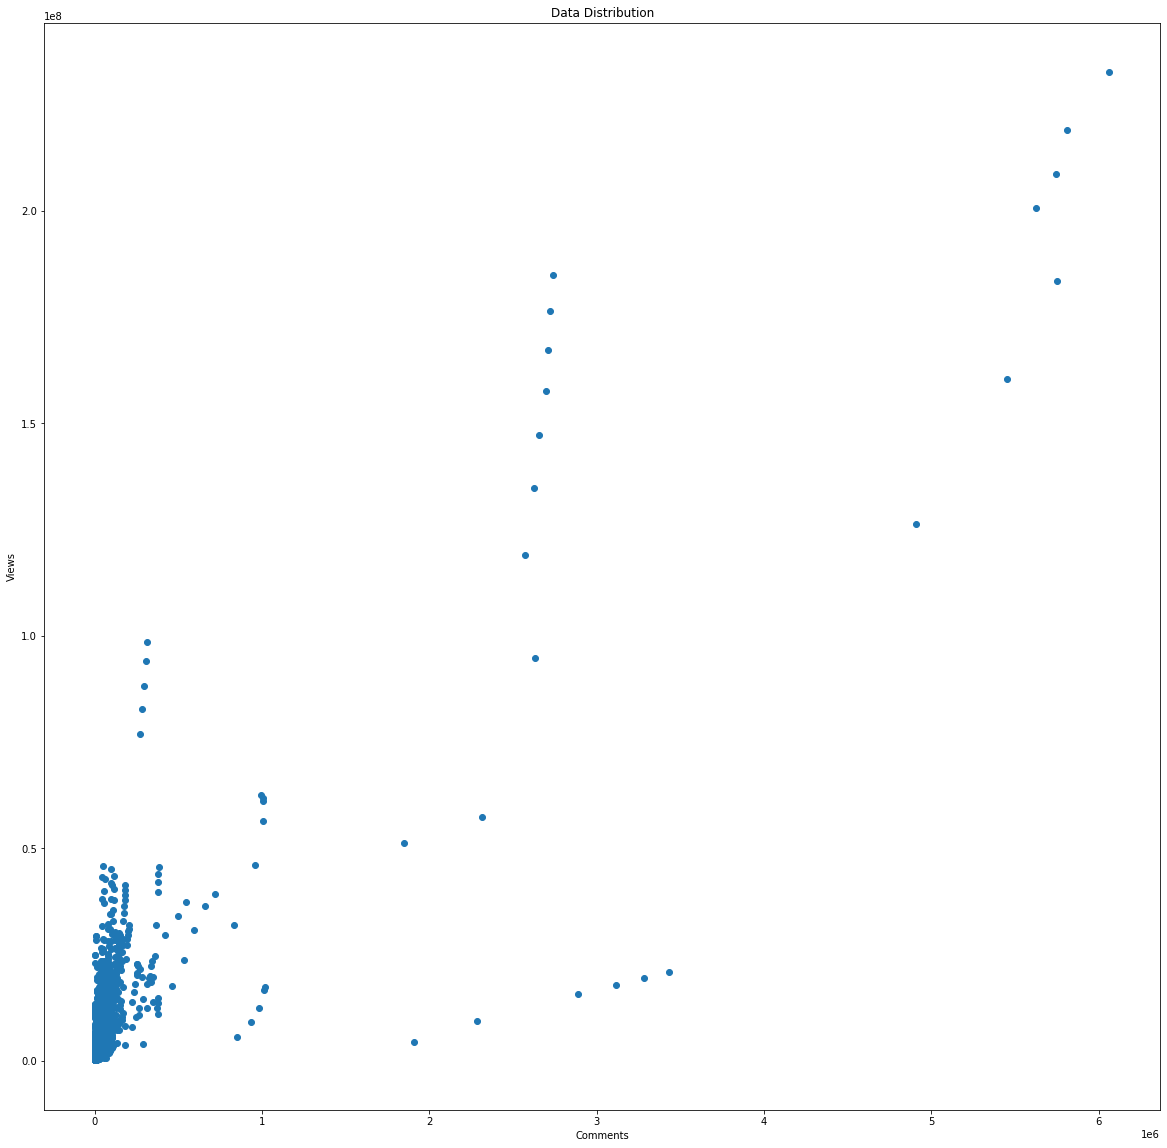

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(videos_dataframe["comment_count"],
            videos_dataframe["view_count"],
            cmap =plt.cm.winter)

plt.xlabel('Comments')
plt.ylabel('Views')

plt.title('Data Distribution')
plt.show()

# Selecting Intrested Columns

In [ ]:
videos_dataframe = videos_dataframe.loc[:, ["categoryId","view_count","likes",
                                            "dislikes","comment_count"]]
videos_dataframe.head()

,categoryId,view_count,likes,dislikes,comment_count
0,22,1514614,156908,5855,35313
1,20,2381688,146739,2794,16549
2,24,2038853,353787,2628,40221
3,10,496771,23251,1856,7647
4,26,1123889,45802,964,2196


In [ ]:
videos_dataframe.shape

(10001, 5)

## Gaussian Mixture Models Clustering

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5)

gmm.fit(videos_dataframe)

GaussianMixture(n_components=5)

In [ ]:
#predictions from gmm

labels = gmm.predict(videos_dataframe)

videos_dataframe['cluster'] = labels

In [ ]:
videos_dataframe.head()

,categoryId,view_count,likes,dislikes,comment_count,cluster
0,22,1514614,156908,5855,35313,0
1,20,2381688,146739,2794,16549,0
2,24,2038853,353787,2628,40221,0
3,10,496771,23251,1856,7647,1
4,26,1123889,45802,964,2196,2


# Number of components in 5 Clusters 

In [ ]:
videos_dataframe["cluster"].value_counts()

2    4641
0    2668
1    1895
3     784
4      13
Name: cluster, dtype: int64

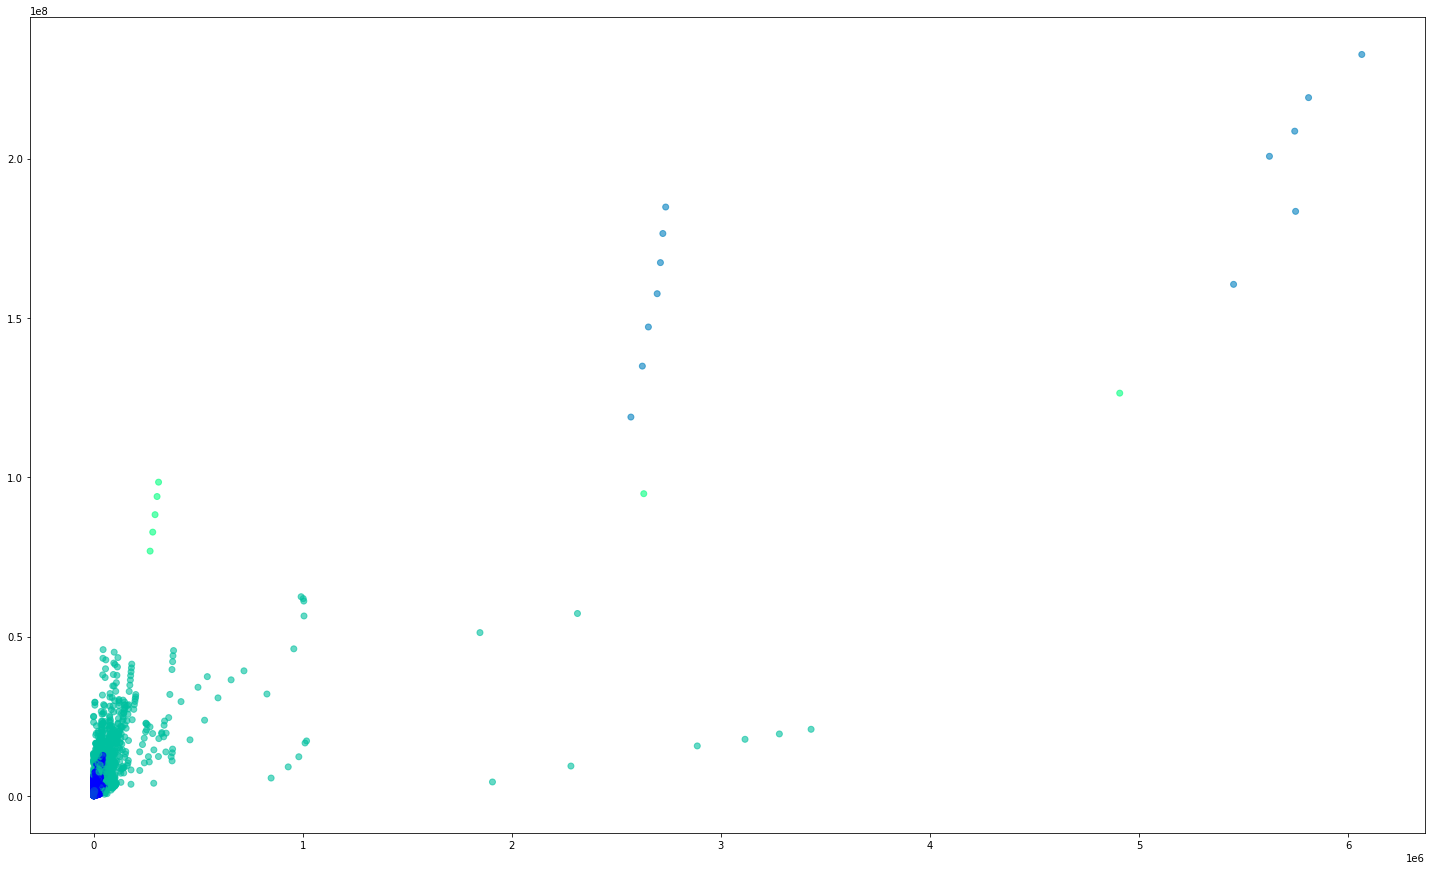

In [ ]:
# Visualizing the clustering 

plt.figure(figsize=(25,15))

plt.scatter(videos_dataframe['comment_count'], 
            videos_dataframe['view_count'],  
            c = GaussianMixture(n_components = 5).fit_predict(videos_dataframe), 
            cmap =plt.cm.winter, alpha = 0.6) 

plt.show() 

# Agglomerative Clustering

Recursively merges pair of clusters of sample data; uses linkage distance.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

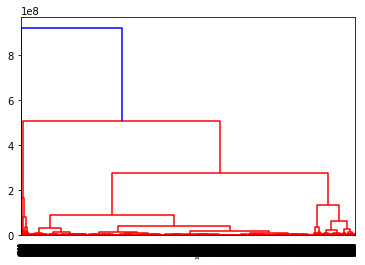

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(videos_dataframe, method='ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(videos_dataframe)
labels = model.labels_

In [ ]:
videos_dataframe["labels"] = labels

In [ ]:
videos_dataframe["labels"].value_counts()

3    8498
1    1251
0     232
2      12
4       8
Name: labels, dtype: int64

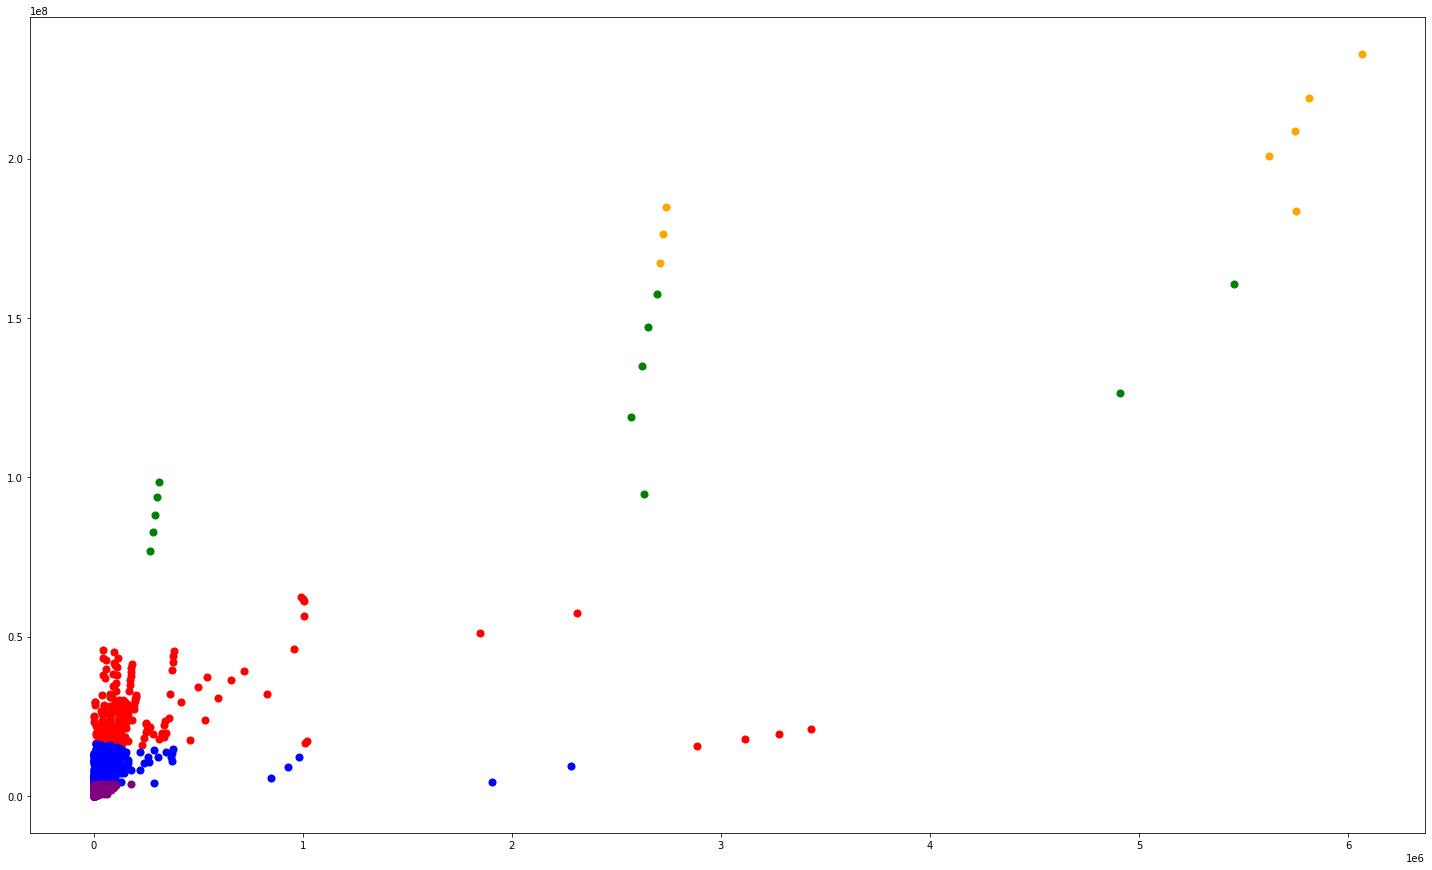

In [ ]:
plt.figure(figsize=(25,15))
plt.scatter(videos_dataframe.loc[labels==0, "comment_count"], 
            videos_dataframe.loc[labels==0, "view_count"], s=50, marker='o', color='red')


plt.scatter(videos_dataframe.loc[labels==1, "comment_count"], 
            videos_dataframe.loc[labels==1, "view_count"], s=50, marker='o', color='blue')

plt.scatter(videos_dataframe.loc[labels==2, "comment_count"], 
            videos_dataframe.loc[labels==2, "view_count"], s=50, marker='o', color='green')

plt.scatter(videos_dataframe.loc[labels==3, "comment_count"], 
            videos_dataframe.loc[labels==3, "view_count"], s=50, marker='o', color='purple')

plt.scatter(videos_dataframe.loc[labels==4, "comment_count"], 
            videos_dataframe.loc[labels==4, "view_count"], s=50, marker='o', color='orange')

plt.show()

## Conclusion

Both GMM and Agglomerative Clustering proves that the cluster with orange color shows that videos having more comments have greater watch rate and user interaction.

## Agglomerative Clustering Clusters

| Cluster | Number of Items |
| --- | ----------- |
| 0 | 232 |
| 1 | 1251 |
| 2 | 12 |
| 3 | 8498 |
| 4 | 8 |


## GMM Clustering Clusters

| Cluster | Number of Items |
| --- | ----------- |
| 0 | 2668 |
| 1 | 1895 |
| 2 | 4641 |
| 3 | 784 |
| 4 | 13 |


## GMM Clustering Clusters

| Cluster | Number of Items |
| --- | ----------- |
| 0 | 2668 |
| 1 | 1895 |
| 2 | 4641 |
| 3 | 784 |
| 4 | 13 |


## KMeans Clustering Clusters

| Cluster | Number of Items |
| --- | ----------- |
| 0 | 8673 |
| 1 | 45 |
| 2 | 14 |
| 3 | 251 |
| 4 | 8673 |


## GMM Performed Better in Clustering Data Points 